# Gem Classifier Inference by Sapir Dahan

In [1]:
import pickle
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

model = tf.keras.models.load_model('/Users/sapirdahan/Dropbox/DeepLearning/Models/')
with open('/Users/sapirdahan/Dropbox/DeepLearning/Models/class_names.txt', 'rb') as fp:
    class_names = pickle.load(fp)

2022-06-02 10:00:37.870654: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1 : Diamond 100.00 %
2 : Aquamarine 0.00 %
3 : Morganite 0.00 %
4 : Chrysoberyl 0.00 %
5 : Tanzanite 0.00 %


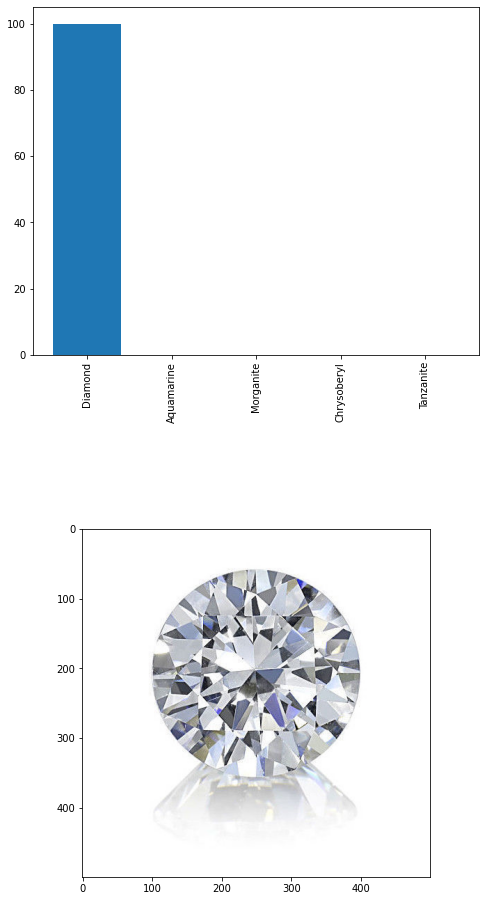

In [3]:
img_path = '/Users/sapirdahan/Dropbox/DeepLearning/Data/new_images/image2.jpg'

IMG_SIZE = (224, 224)
img = Image.open(img_path)
img_for_plot = img
img = img.resize(IMG_SIZE)
img = np.array(img)
img = img.reshape(1,IMG_SIZE[0],IMG_SIZE[1],3)
img_pred = model.predict(img)

pred_list = []
conf_list = []
for i in range(5):
    test_class = tf.argmax(img_pred, axis=1)
    pred = class_names[int(test_class)]
    conf = img_pred[0, int(test_class)]*100.0
    print(i+1, ":", pred, "%.2f"%conf,"%")
    pred_list.append(pred)
    conf_list.append(conf)
    img_pred[0,int(test_class)] = 0

nothing = plt.figure(figsize=(8, 16))
nothing = plt.subplot(2, 1, 1)
nothing = plt.bar(pred_list, conf_list)
nothing = plt.xticks(pred_list, rotation='vertical')
nothing = plt.subplot(2, 1, 2)
nothing = plt.imshow(img_for_plot)
plt.subplots_adjust(hspace=0.5)